In [1]:
import pandas as pd
from aim import Repo, Run, Text, Texts
from aim.storage.context import Context

In [2]:
repo = Repo.from_path(".")

In [3]:
def get_scores_df(repo: Repo, run_hash: str) -> pd.DataFrame:
    run = Run(repo=repo, run_hash=run_hash, read_only=True)
    # data was stored in json format
    data = (
        run.get_text_sequence("scores", context=Context({})).values.first_value().data
    )
    return pd.read_json(data)

In [4]:
df = get_scores_df(repo, "7f04fe483ede45089a5a58dc")

In [5]:
from skrough.ranks import compare_ranks

compare_ranks(df, attr_col="column", score_col="global_gain", top_ks=[5, 10, 15, 20])

,attr_type,top_k,avg_rank
0,original,all,21408.097208
1,shuffled,all,23146.902792
2,original,5,3.000000
3,shuffled,5,1392.600000
4,original,10,5.500000
5,shuffled,10,1461.700000
6,original,15,8.000000
7,shuffled,15,2966.833333
8,original,20,10.500000
9,shuffled,20,8015.250000


In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import (  # precision_recall_curve,; roc_auc_score,
    PrecisionRecallDisplay,
    RocCurveDisplay,
    roc_curve,
)

y_true = df["column"].str.startswith("shuffled_")
y_pred = df["global_gain"]
# RocCurveDisplay.from_predictions(1 - y_true, y_pred)
# PrecisionRecallDisplay.from_predictions(1 - y_true, y_pred)

In [9]:
from skrough.ranks import get_attr_ranks

q = get_attr_ranks(df, "column", "global_gain")

2024.9652556448355

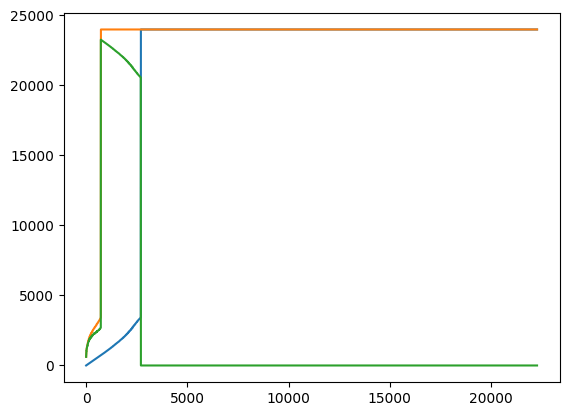

In [59]:
# df = get_scores_df(repo, "7f04fe483ede45089a5a58dc") # 3
df = get_scores_df(repo, "d01aa78a79c141dcaf10ddc2")  # 16
q = get_attr_ranks(df, "column", "global_gain")
plt.plot(q.original)
plt.plot(q.shuffled)
plt.plot(q.shuffled - q.original)

# plt.xscale('log')
(q.shuffled - q.original).mean()

24.849441127620416

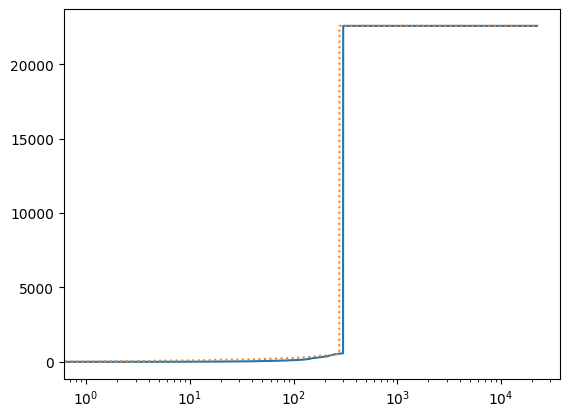

In [70]:
# df = get_scores_df(repo, "ac620d8764b64b15ab448ae2") # 2
df = get_scores_df(repo, "59552be734ae42979125e6a8")  # 10
q = get_attr_ranks(df, "column", "total_gain")
plt.plot(q.original)
plt.plot(q.shuffled, linestyle="dotted")
# plt.plot(q.shuffled-q.original)
plt.xscale("log")

(q.shuffled - q.original).mean()

14418.69147551286

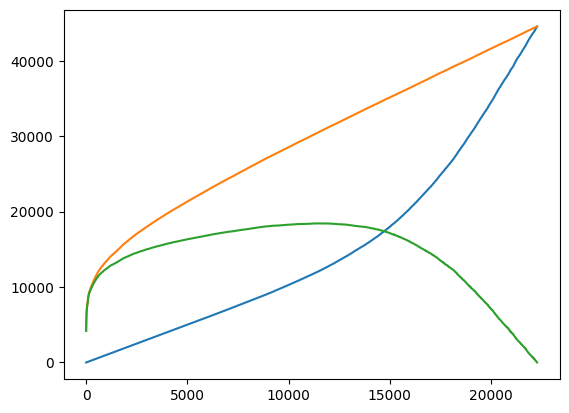

In [60]:
df = get_scores_df(repo, "0ac68899abed4b9fbe203af5")
q = get_attr_ranks(df, "column", "spearman_correlation")
plt.plot(q.original)
plt.plot(q.shuffled)
plt.plot(q.shuffled - q.original)
(q.shuffled - q.original).mean()